In [1]:
import pandas as pd
import glob
import os

#combines all days of data 

def read_and_combine_csv(folder_path='.'):
    file_pattern = os.path.join(folder_path, 'market_data_2023*.csv')
    csv_files = glob.glob(file_pattern)

    # Read and concatenate all CSV files
    combined_df = pd.concat([pd.read_csv(f) for f in csv_files])
    
    # Convert 'timestamp' column to datetime and sort
    combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])
    combined_df.sort_values(by='timestamp', inplace=True)

    return combined_df

# Specify the folder path where your CSV files are stored
folder_path = '.'  # Update this to the path of your CSV folder
combined_df = read_and_combine_csv(folder_path)

# Save the combined data to a new CSV file
combined_df.to_csv('combined_market_data.csv', index=False)

print("Combined CSV created: 'combined_market_data.csv'")

Combined CSV created: 'combined_market_data.csv'


In [2]:
import pandas as pd

# Load the CSV file
csv_file = "combined_market_data.csv"
df = pd.read_csv(csv_file)

# Calculate the rolling average for the last 100 rows and rename the column to '100DPA'
df['100DPA'] = df['price'].rolling(100, min_periods=100).mean()

# Initialize the new columns with zeros
df['above_100DPA'] = 0
df['has_price_gone_above_100DPA_yet'] = 0

# Track whether the price has crossed above 100DPA
price_above_100DPA = False

# Iterate through the DataFrame
for index, row in df.iterrows():
    if row['price'] > row['100DPA']:
        if not price_above_100DPA:
            df.at[index, 'above_100DPA'] = 1
            df.at[index, 'has_price_gone_above_100DPA_yet'] = 1
            price_above_100DPA = True
        else:
            df.at[index, 'has_price_gone_above_100DPA_yet'] = 1
    else:
        price_above_100DPA = False

# Save the updated DataFrame back to the CSV file
df.to_csv(csv_file, index=False)

In [3]:
import pandas as pd

# Load the CSV file
csv_file = "combined_market_data.csv"
df = pd.read_csv(csv_file)

# Calculate the rolling average for the last 1000 rows and rename the column to '1000DPA'
df['1000DPA'] = df['price'].rolling(1000, min_periods=1000).mean()

# Initialize the new columns with zeros
df['above_1000DPA'] = 0
df['has_price_gone_above_1000DPA_yet'] = 0

# Track whether the price has crossed above 100DPA
price_above_1000DPA = False

# Iterate through the DataFrame
for index, row in df.iterrows():
    if row['price'] > row['1000DPA']:
        if not price_above_1000DPA:
            df.at[index, 'above_1000DPA'] = 1
            df.at[index, 'has_price_gone_above_1000DPA_yet'] = 1
            price_above_1000DPA = True
        else:
            df.at[index, 'has_price_gone_above_1000DPA_yet'] = 1
    else:
        price_above_1000DPA = False

# Save the updated DataFrame back to the CSV file
df.to_csv(csv_file, index=False)


Unsold Transactions:

Total Profit: -19973.500000000568

Profit Database:
      Order  Buy Index  Sell Index  Profit  Positive Profit Buy Signals
0         0      37924       37947    -0.3            False   [1, 1, 1]
1         1      37976       37977    -0.2            False   [1, 1, 1]
2         2      37996       37997    -0.2            False   [1, 1, 1]
3         3      37998       38006    -0.2            False   [1, 1, 1]
4         4      38019       38020    -0.2            False   [1, 1, 1]
...     ...        ...         ...     ...              ...         ...
5369   5369    5147376     5147377    -0.2            False   [1, 1, 1]
5370   5370    5147383     5147384    -0.2            False   [1, 1, 1]
5371   5371    5170045     5170046    -0.2            False   [1, 1, 1]
5372   5372    5170047     5170048    -2.4            False   [1, 1, 1]
5373   5373    5170068     5170069    -1.1            False   [1, 1, 1]

[5374 rows x 6 columns]
Number of Orders: 5374


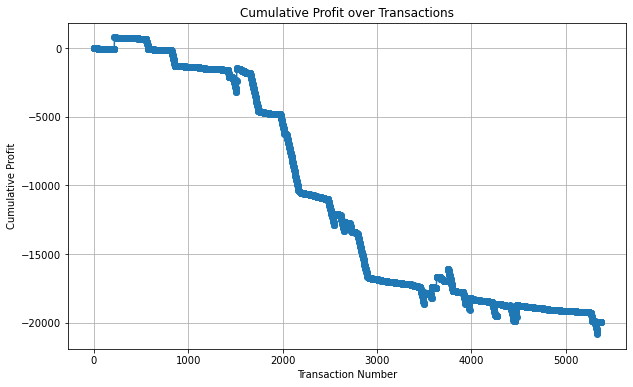


Profitable Transactions:
      Order  Buy Index  Sell Index  Profit  Positive Profit Buy Signals
31       31      38217       64032     1.6             True   [1, 1, 1]
40       40      72242       87841     1.2             True   [1, 1, 1]
99       99     132278      134456     1.2             True   [1, 1, 1]
218     218     157435      159094   843.7             True   [1, 1, 1]
416     416     248914      250142     0.5             True   [1, 1, 1]
425     425     250275      251616     0.2             True   [1, 1, 1]
514     514     268672      273403     0.4             True   [1, 1, 1]
544     544     273889      316772     7.7             True   [1, 1, 1]
681     681     408810      420432     1.0             True   [1, 1, 1]
692     692     440140      452211     2.4             True   [1, 1, 1]
714     714     452428      455055     0.2             True   [1, 1, 1]
716     716     455064      483610     4.8             True   [1, 1, 1]
899     899     590733      596905    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def trading_strategy(file_path):
    df = pd.read_csv(file_path)
    df = df.dropna(subset=['price'])

    buy_positions = []
    sell_positions = []
    total_profit = 0
    order_number = 0
    transaction_details = []
    profit_database = []  # To store details for profit database

    for index, row in df.iterrows():
        buy_signals = [row['above_daily_moving_average'], row['above_100DPA'], row['above_1000DPA']]
        if sum(buy_signals) >= 3:
            buy_price = row['price']
            quantity = 10
            buy_positions.append((order_number, index, buy_price, quantity, buy_signals))
            order_number += 1

        for order, buy_index, buy_price, quantity, buy_signals in list(buy_positions):
            current_price = row['price']
            profit_percentage = ((current_price - buy_price) / buy_price) * 100

            if profit_percentage > 6 or (current_price <= row['1000DPA']):
                if (order, buy_index, buy_price, quantity, buy_signals) in buy_positions:
                    profit = (current_price - buy_price) * quantity
                    total_profit += profit
                    sell_positions.append((order, index, current_price, quantity, profit))
                    transaction_details.append((order, (buy_index, buy_price, buy_signals), (index, current_price), profit))
                    profit_database.append({'Order': order, 'Buy Index': buy_index, 'Sell Index': index, 'Profit': profit, 'Positive Profit': profit > 0, 'Buy Signals': buy_signals})
                    buy_positions.remove((order, buy_index, buy_price, quantity, buy_signals))

    # Mark unsold transactions
    unsold_transactions = [{'Order': pos[0], 'Index': pos[1], 'Buy Price': pos[2], 'Quantity': pos[3], 'Buy Signals': pos[4]} for pos in buy_positions]
    
    return sell_positions, total_profit, transaction_details, profit_database, unsold_transactions

# Define the file path
file_path = 'combined_market_data.csv'

# Execute the strategy
sell_positions, total_profit, transaction_details, profit_database, unsold_transactions = trading_strategy(file_path)

# Output the results
print("\nUnsold Transactions:")
for unsold in unsold_transactions:
    print(unsold)

print("\nTotal Profit:", total_profit)

# Create DataFrame for profit database
profit_df = pd.DataFrame(profit_database)
print("\nProfit Database:")
print(profit_df)
number_of_orders = profit_df['Order'].nunique()
print("Number of Orders:", number_of_orders)

# Plotting the profit timeline
profits = [td[3] for td in transaction_details]  # Extract profits from transaction details
cumulative_profits = [sum(profits[:i+1]) for i in range(len(profits))]  # Cumulative sum of profits

plt.figure(figsize=(10, 6))
plt.plot(cumulative_profits, marker='o', linestyle='-')
plt.title('Cumulative Profit over Transactions')
plt.xlabel('Transaction Number')
plt.ylabel('Cumulative Profit')
plt.grid(True)
plt.show()
# Filter the DataFrame to show only profitable transactions
profitable_transactions = profit_df[profit_df['Positive Profit'] == True]


# Print profitable transactions
print("\nProfitable Transactions:")
print(profitable_transactions)

NameError: name 'order' is not defined